# Day Ahead Prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
day_ahead = pd.read_csv('data/Day Ahead Auction Prices.csv')
day_ahead['Date'] = pd.to_datetime(day_ahead['Date'])
day_ahead.set_index('Date', inplace=True)
day_ahead.columns = ['price']
day_ahead.index.max()

Timestamp('2024-05-31 23:00:00')

<Axes: xlabel='Date'>

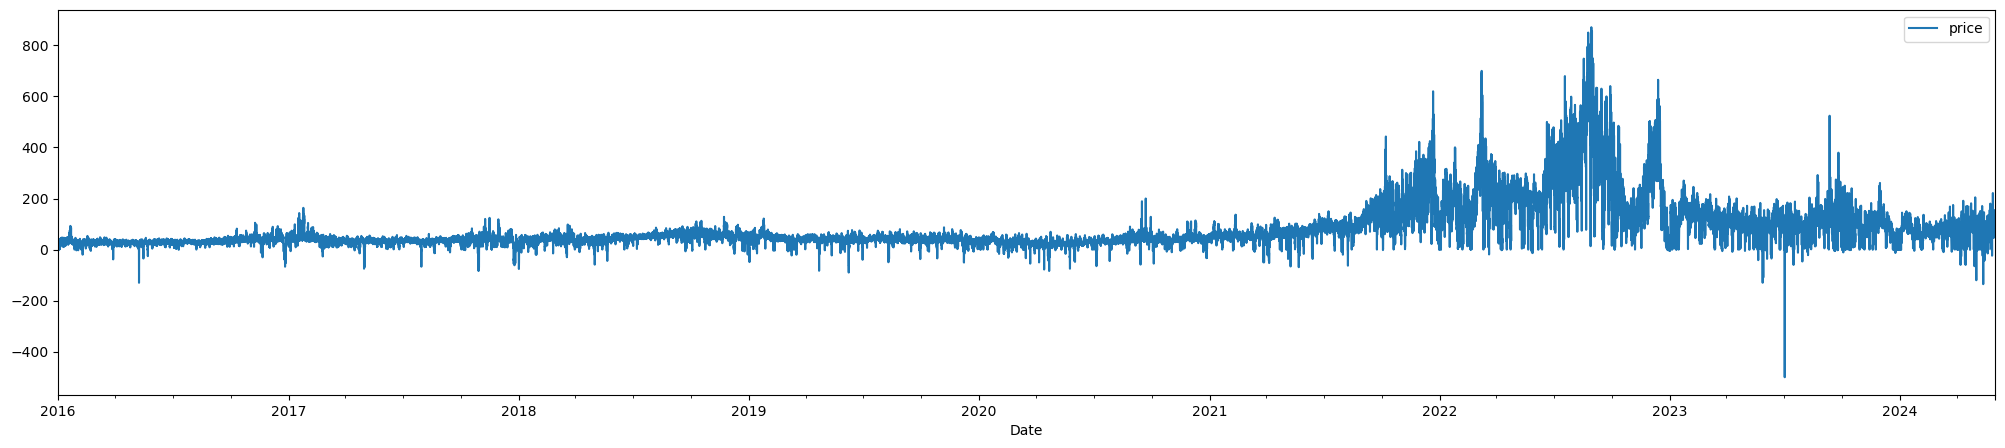

In [18]:
day_ahead.plot(figsize=(25, 5))

<Axes: xlabel='Date'>

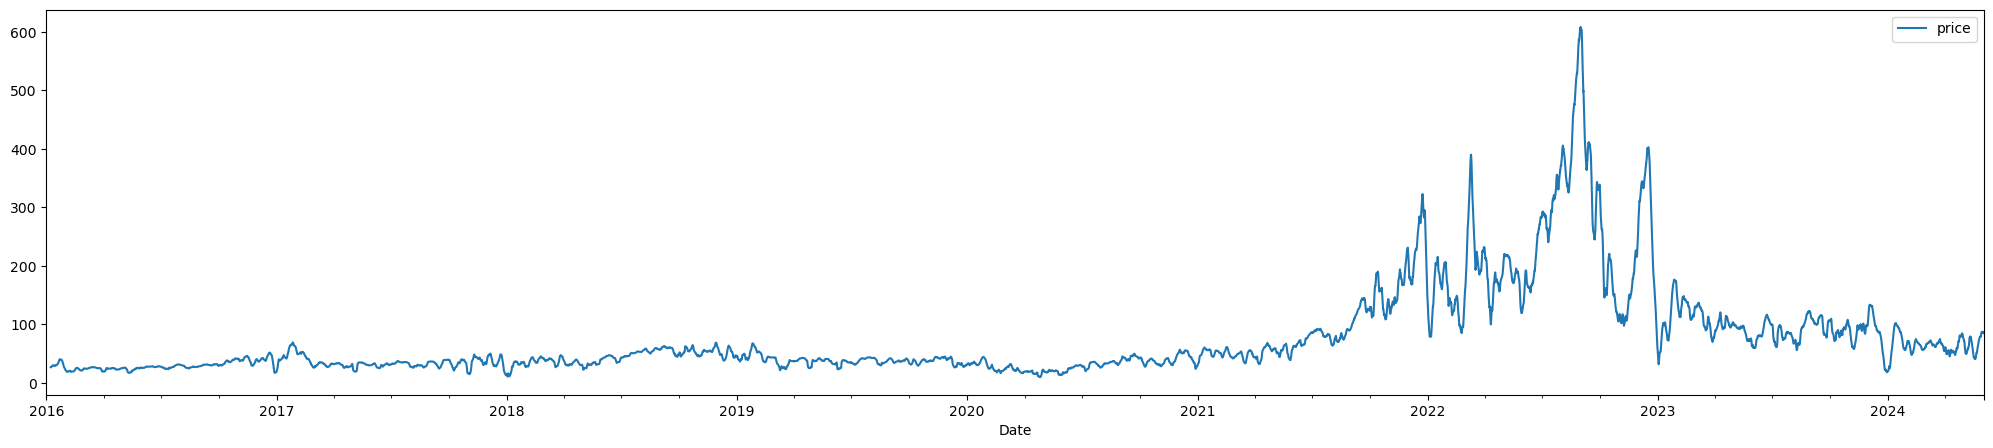

In [19]:
day_ahead.rolling(24*7).mean().plot(figsize=(25, 5))

array([[<Axes: title={'center': 'price'}>]], dtype=object)

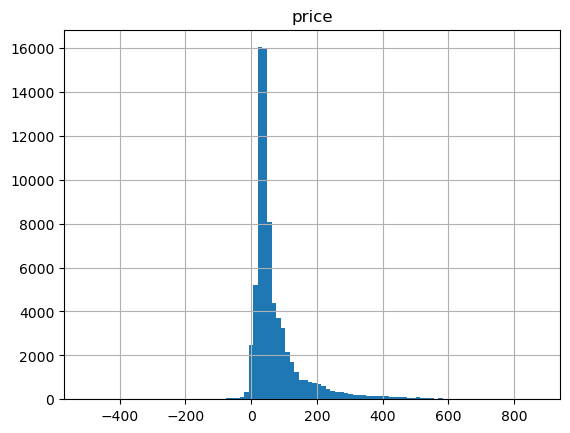

In [5]:
day_ahead.hist(bins=100)

In [6]:
day_ahead[day_ahead['price']==min(day_ahead.price)]

,price
Date,
2023-07-02 14:00:00,-500.0


What happened on 7th februar 2023?

C:\Users\wankm\AppData\Local\Temp\ipykernel_3480\274244495.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  day_ahead['2023-07-02'].plot()


<Axes: xlabel='Date'>

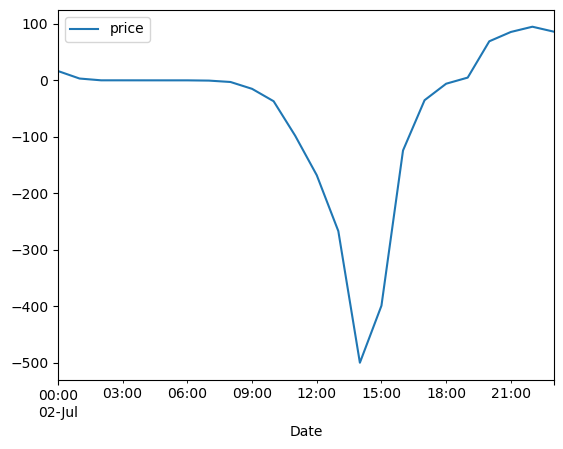

In [7]:
#filter for 7th february 2023
day_ahead['2023-07-02'].plot()

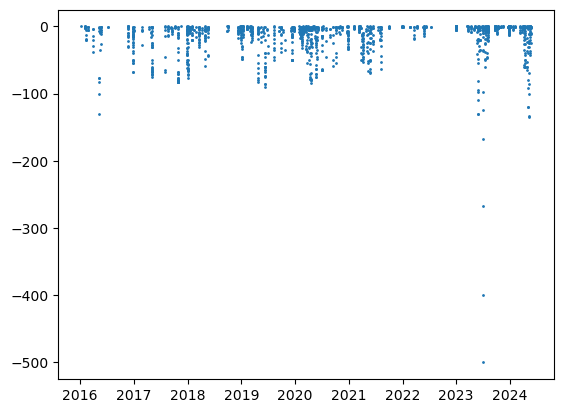

In [8]:
plt.scatter(day_ahead[day_ahead['price']<0].index, day_ahead[day_ahead['price']<0].price,s=1)

# Holiday Calendar

In [9]:
holidays = pd.read_csv('data/PUBLIC_HOLIDAYS_CALENDAR_GERMANY_2019-2024.csv',sep=';')
holidays.head()

,Identifier,TimeStamp,Begin,End,DayStatus,DayName,ValidationStatus,ChangeComment
0,PUBLIC_HOLIDAYS_CALENDAR_GERMANY,2019-01-01T00:00:00.000+0100,2019-01-01T00:00:00.000+0100,2019-01-02T00:00:00.000+0100,True,New Year's Day,UNVALIDATED,NaN
1,PUBLIC_HOLIDAYS_CALENDAR_GERMANY,2019-01-02T00:00:00.000+0100,2019-01-02T00:00:00.000+0100,2019-01-03T00:00:00.000+0100,False,None,UNVALIDATED,NaN
2,PUBLIC_HOLIDAYS_CALENDAR_GERMANY,2019-01-03T00:00:00.000+0100,2019-01-03T00:00:00.000+0100,2019-01-04T00:00:00.000+0100,False,None,UNVALIDATED,NaN
3,PUBLIC_HOLIDAYS_CALENDAR_GERMANY,2019-01-04T00:00:00.000+0100,2019-01-04T00:00:00.000+0100,2019-01-05T00:00:00.000+0100,False,None,UNVALIDATED,NaN
4,PUBLIC_HOLIDAYS_CALENDAR_GERMANY,2019-01-05T00:00:00.000+0100,2019-01-05T00:00:00.000+0100,2019-01-06T00:00:00.000+0100,False,None,UNVALIDATED,NaN


In [10]:
print(holidays.Identifier.unique())
holidays.drop(columns=['Identifier'],inplace=True)
holidays.ChangeComment.unique()
holidays.drop(columns=['ChangeComment'],inplace=True)
print(holidays.ValidationStatus.value_counts())
holidays.drop(columns=['ValidationStatus'],inplace=True)


['PUBLIC_HOLIDAYS_CALENDAR_GERMANY']
UNVALIDATED    2115
Name: ValidationStatus, dtype: int64


In [11]:
holidays.DayStatus.value_counts()

False    2063
True       52
Name: DayStatus, dtype: int64

In [12]:
holidays[(holidays.DayStatus==True) & (holidays.DayName.isnull())]
#all holiday have a day name

,TimeStamp,Begin,End,DayStatus,DayName


In [13]:
#check length
holidays["length"] = pd.to_datetime(holidays["End"]) - pd.to_datetime(holidays["Begin"])
holidays.length.value_counts()
#summer time messes up sometimes

1 days 00:00:00    2104
0 days 23:00:00       6
1 days 01:00:00       5
Name: length, dtype: int64

# Future Contracts

In [23]:
daily = pd.read_csv('data/forwards/EEX_POWER_FUT_DE_BASE_D_2021-2024.csv',sep=';')
daily.drop(columns=['Price','ChangeComment','ValidationStatus'],inplace=True)
daily.TimeStamp.max()

'2024-10-14T00:00:00.000+0200'

<Axes: >

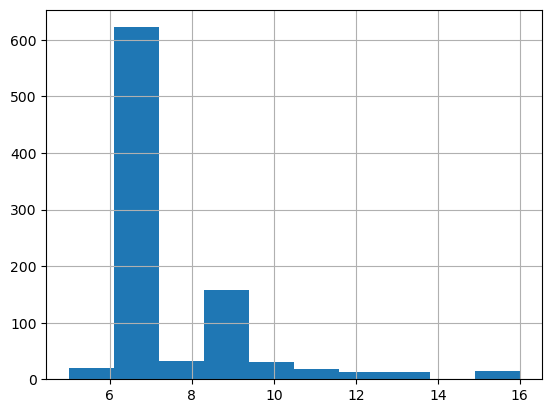

In [49]:
#find minimum and maximum number of contracts per timestamp
daily.groupby('TimeStamp').Settlement.count().hist()

<Axes: >

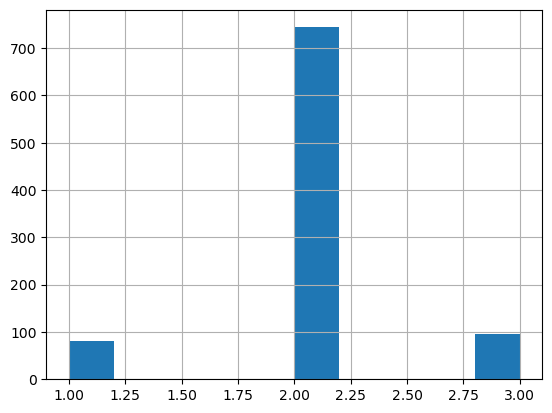

In [45]:
weekend = pd.read_csv('data/forwards/EEX_POWER_FUT_DE_BASE_WE_2021-2024.csv',sep=';')
weekend.groupby('TimeStamp').Settlement.count().hist()

<Axes: >

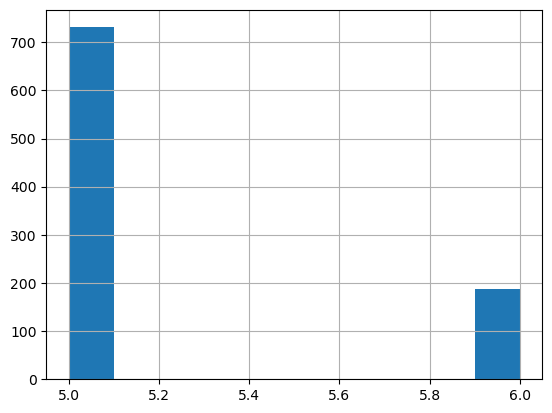

In [59]:
week = pd.read_csv('data/forwards/EEX_POWER_FUT_DE_BASE_W_2021-2024.csv',sep=';')
week.groupby('TimeStamp').Settlement.count().hist()

<Axes: >

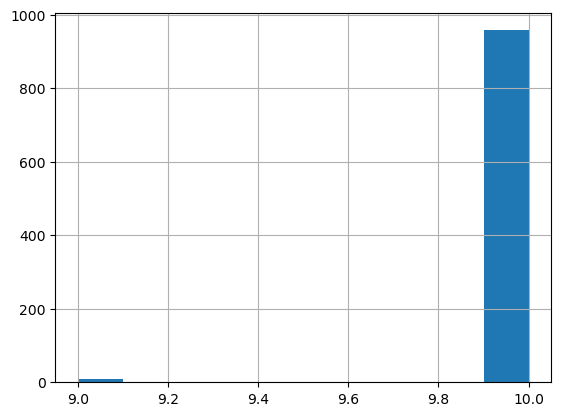

In [58]:
month = pd.read_csv('data/forwards/EEX_POWER_FUT_DE_BASE_M_2021-2024.csv',sep=';')
month.groupby('TimeStamp').Settlement.count().hist()

<Axes: >

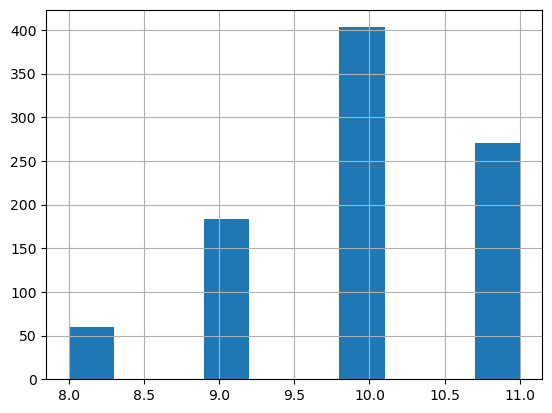

In [37]:
quarter = pd.read_csv('data/forwards/EEX_POWER_FUT_DE_BASE_Q_2021-2024.csv',sep=';')
quarter.groupby('TimeStamp').count().Settlement.hist()

,Identifier,TimeStamp,Begin,End,Open,High,Low,Close,Settlement,Price,ValidationStatus,ChangeComment
1258,EEX_POWER_FUT_DE_BASE_Y,2021-10-14T00:00:00.000+0200,2022-01-01T00:00:00.000+0100,2023-01-01T00:00:00.000+0100,"129,50","135,75","128,75","135,25","132,47",NaN,UNVALIDATED,NaN
1259,EEX_POWER_FUT_DE_BASE_Y,2021-10-14T00:00:00.000+0200,2023-01-01T00:00:00.000+0100,2024-01-01T00:00:00.000+0100,"84,95","87,95","84,95","87,95","86,26",NaN,UNVALIDATED,NaN
1260,EEX_POWER_FUT_DE_BASE_Y,2021-10-14T00:00:00.000+0200,2024-01-01T00:00:00.000+0100,2025-01-01T00:00:00.000+0100,"72,05","72,40","71,60","72,20","72,32",NaN,UNVALIDATED,NaN
1261,EEX_POWER_FUT_DE_BASE_Y,2021-10-14T00:00:00.000+0200,2025-01-01T00:00:00.000+0100,2026-01-01T00:00:00.000+0100,"71,00","71,00","71,00","71,00","71,02",NaN,UNVALIDATED,NaN
1262,EEX_POWER_FUT_DE_BASE_Y,2021-10-14T00:00:00.000+0200,2026-01-01T00:00:00.000+0100,2027-01-01T00:00:00.000+0100,NaN,NaN,NaN,NaN,"70,04",NaN,UNVALIDATED,NaN
1263,EEX_POWER_FUT_DE_BASE_Y,2021-10-14T00:00:00.000+0200,2027-01-01T00:00:00.000+0100,2028-01-01T00:00:00.000+0100,NaN,NaN,NaN,NaN,"69,77",NaN,UNVALIDATED,NaN
1264,EEX_POWER_FUT_DE_BASE_Y,2021-10-14T00:00:00.000+0200,2028-01-01T00:00:00.000+0100,2029-01-01T00:00:00.000+0100,NaN,NaN,NaN,NaN,"69,03",NaN,UNVALIDATED,NaN
1265,EEX_POWER_FUT_DE_BASE_Y,2021-10-14T00:00:00.000+0200,2029-01-01T00:00:00.000+0100,2030-01-01T00:00:00.000+0100,NaN,NaN,NaN,NaN,"68,35",NaN,UNVALIDATED,NaN
1266,EEX_POWER_FUT_DE_BASE_Y,2021-10-14T00:00:00.000+0200,2030-01-01T00:00:00.000+0100,2031-01-01T00:00:00.000+0100,NaN,NaN,NaN,NaN,"68,00",NaN,UNVALIDATED,NaN
1267,EEX_POWER_FUT_DE_BASE_Y,2021-10-14T00:00:00.000+0200,2031-01-01T00:00:00.000+0100,2032-01-01T00:00:00.000+0100,NaN,NaN,NaN,NaN,"67,59",NaN,UNVALIDATED,NaN


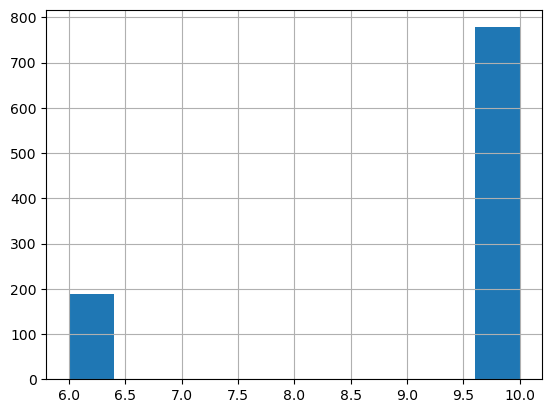

In [61]:
year = pd.read_csv('data/forwards/EEX_POWER_FUT_DE_BASE_Y_2021-2024.csv',sep=';')
year.groupby('TimeStamp').count().Settlement.hist()
year[year.TimeStamp=="2021-10-14T00:00:00.000+0200"]